# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
#there was a typo in this comment line haha
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL 
#I took this url directly from one of our class activities - open weather dataframe
#I was missing "units=Metric&" in my original URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #I had no idea what this was asking me to do, I was struggling to understand what the cities were. 
    #after hours of reviewing lectures, and finally asking ChatGPT, I understand its asking for a query URL.
    #It would be super helpful to just say that outright rather than changing wording during homework assignemnts.
    #I am using the query url from my open weather dataframe class activity.
    #I decided to go with metric because it is most common in the rest of the world.
    city_url = f"q={city}&appid={weather_api_key}"
    #this is the URL I origninally had - f"{url}appid={weather_api_key}&units=metric&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        #for this code, we jsonify our city url data right away
        #I  was missing url+ before city_url
        city_weather = requests.get(url+city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        #using activity Burundi weather, I looked at the JSON response and understood what each item would look like
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | motueka
Processing Record 2 of Set 1 | yingshang chengguanzhen
Processing Record 3 of Set 1 | invercargill
Processing Record 4 of Set 1 | grand falls-windsor
Processing Record 5 of Set 1 | isafjordur
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | kenora
Processing Record 9 of Set 1 | neiafu
Processing Record 10 of Set 1 | minas de marcona
Processing Record 11 of Set 1 | san patricio
Processing Record 12 of Set 1 | mount gambier
Processing Record 13 of Set 1 | chui
Processing Record 14 of Set 1 | suksun
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | hamilton
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | chimoio
Processing Record 21 of Set 1 | la passe
Proce

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,motueka,-41.1333,173.0167,20.05,82,100,1.43,NZ,1737755708
1,yingshang chengguanzhen,32.6295,116.2701,5.47,88,100,6.52,CN,1737755710
2,invercargill,-46.4000,168.3500,15.57,83,100,2.68,NZ,1737755711
3,grand falls-windsor,48.9332,-55.6649,-6.39,72,84,1.34,CA,1737755712
4,isafjordur,66.0755,-23.1240,-1.06,95,100,2.66,IS,1737755713


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,motueka,-41.1333,173.0167,20.05,82,100,1.43,NZ,1737755708
1,yingshang chengguanzhen,32.6295,116.2701,5.47,88,100,6.52,CN,1737755710
2,invercargill,-46.4000,168.3500,15.57,83,100,2.68,NZ,1737755711
3,grand falls-windsor,48.9332,-55.6649,-6.39,72,84,1.34,CA,1737755712
4,isafjordur,66.0755,-23.1240,-1.06,95,100,2.66,IS,1737755713


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

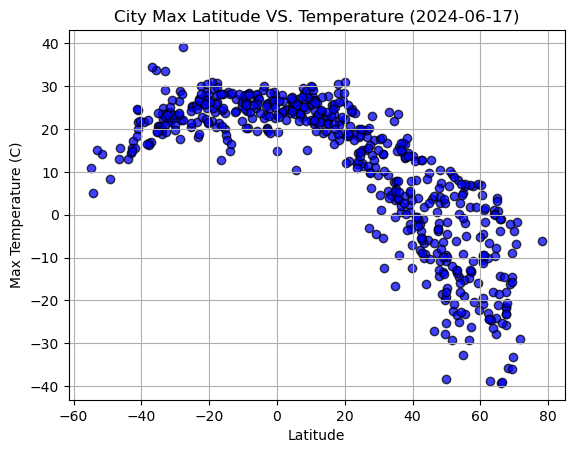

In [8]:
# Build scatter plot for latitude vs. temperature
lat_value = city_data_df["Lat"]
temp_value = city_data_df['Max Temp']
plt.scatter(lat_value, temp_value, marker='o', facecolors='b', alpha=0.75, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude VS. Temperature (2024-06-17)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

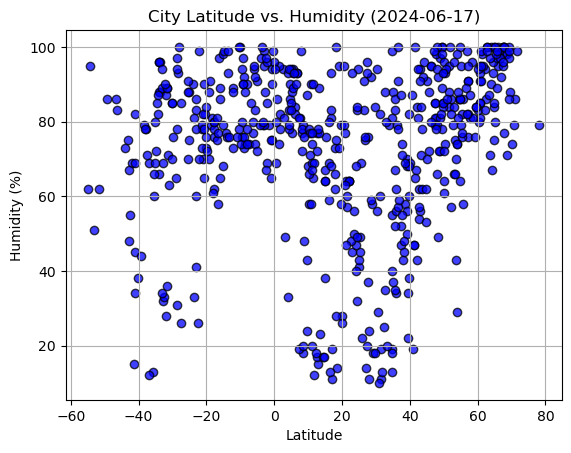

In [9]:
# Build the scatter plots for latitude vs. humidity
humidity_values = city_data_df["Humidity"]
plt.scatter(lat_value,humidity_values,marker="o", edgecolors="black", facecolor= 'b', alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

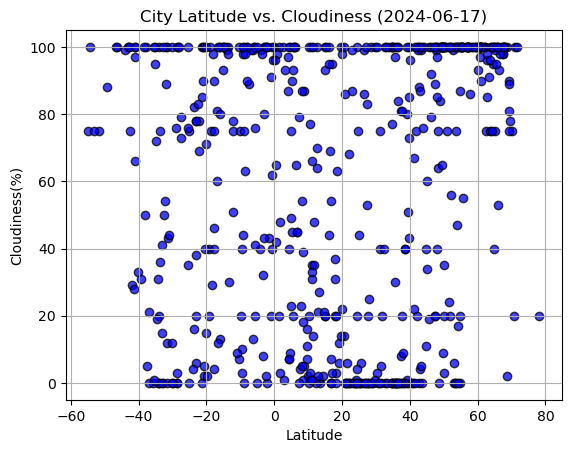

In [10]:
# Build the scatter plots for latitude vs. cloudiness
cloud_value = city_data_df['Cloudiness']
plt.scatter(lat_value, cloud_value, marker= 'o', edgecolors='black', facecolor='b', alpha=0.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs. Cloudiness (2024-06-17)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

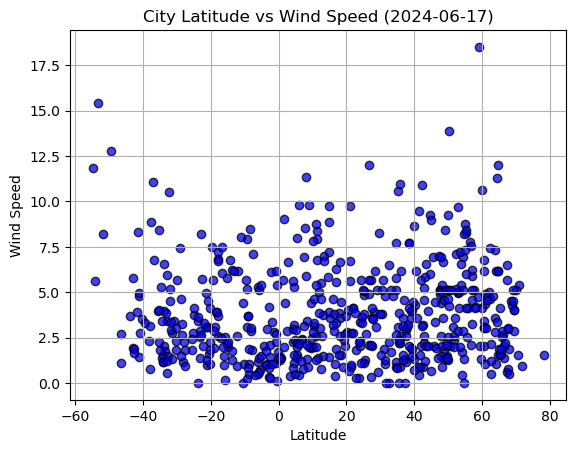

In [11]:
# Build the scatter plots for latitude vs. wind speed
wind_value = city_data_df['Wind Speed']
plt.scatter(lat_value, wind_value, marker='o', edgecolors='black', facecolor='b', alpha=0.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs Wind Speed (2024-06-17)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
#Megan Iyer helped me with this, and ChatGPT explained / broke it down for me.
def plot_linear_regression(x_values, y_values, coordinates, label): 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(label)
    plt.title(f"Latitude vs {label}")
    print(f"The r^2-value is {rvalue**2}")
    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yingshang chengguanzhen,32.6295,116.2701,5.47,88,100,6.52,CN,1737755710
3,grand falls-windsor,48.9332,-55.6649,-6.39,72,84,1.34,CA,1737755712
4,isafjordur,66.0755,-23.1240,-1.06,95,100,2.66,IS,1737755713
6,bethel,41.3712,-73.4140,-0.59,47,67,0.45,US,1737755716
7,kenora,49.8167,-94.4337,-9.46,85,100,5.14,CA,1737755717


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,motueka,-41.1333,173.0167,20.05,82,100,1.43,NZ,1737755708
2,invercargill,-46.4000,168.3500,15.57,83,100,2.68,NZ,1737755711
5,port-aux-francais,-49.3500,70.2167,8.25,86,88,12.81,TF,1737755714
8,neiafu,-18.6500,-173.9833,29.38,79,75,3.09,TO,1737755718
9,minas de marcona,-15.2119,-75.1103,19.92,68,93,5.80,PE,1737755719


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is 0.7141686425222196


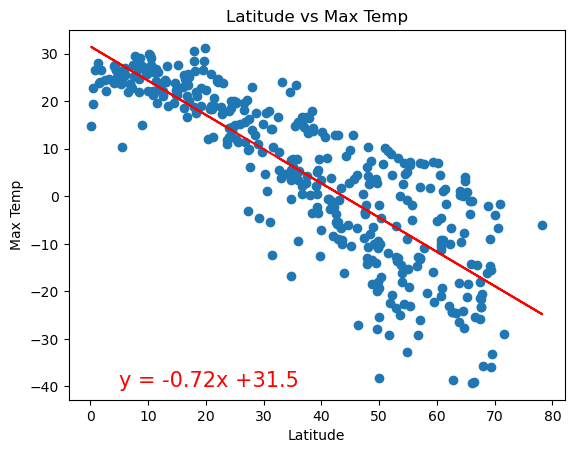

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values,(5,-40), "Max Temp")

The r^2-value is 0.22483678916678176


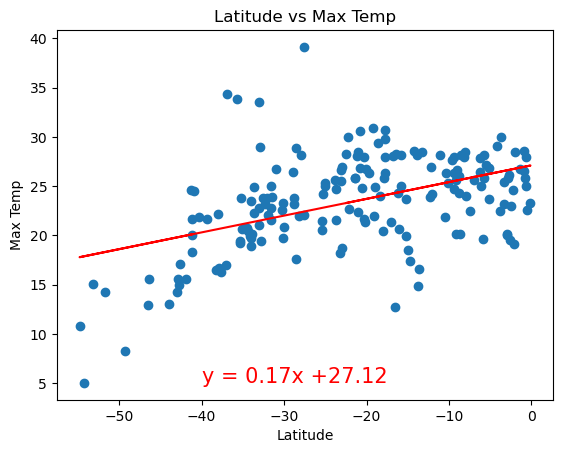

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, (-40,5), "Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
The Northern Hemisphere shows a stronger negative correlation between latitude and temperature, with temperatures dropping more quickly the further you move north, away from the equator.
The Southern Hemisphere has a weaker, more gradual positive relationship, likely due to its greater ocean coverage, which might influence temperature patterns.
Overall the link between latitude and temperature is more predicatble in the Nothern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is 0.12302434818738718


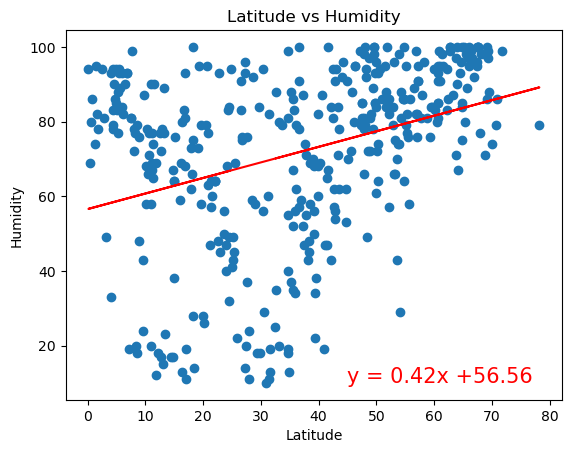

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values, (45,10), "Humidity")

The r^2-value is 0.1408733836324129


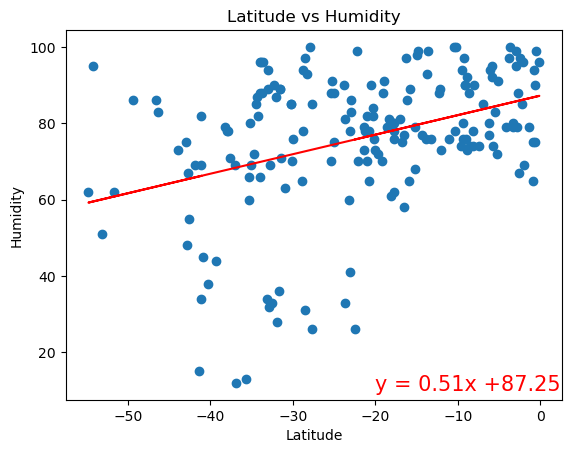

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values, (-20,10), "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
The Northern Hemisphere shows a moderate positive relationship between latitude and humidity, while the Southern Hemisphere's relationship is weaker. Overall, humidity and 
latitude have a weak correlation in both hemispheres, with the Norther Hemisphere showing a slightly stronger link.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is 0.15703252254240863


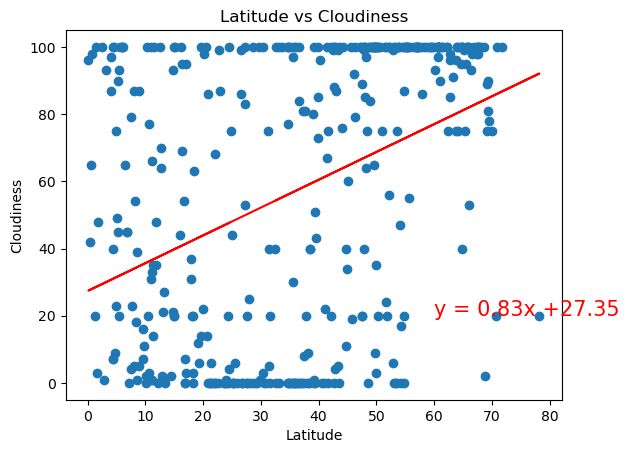

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values, (60,20), "Cloudiness")

The r^2-value is 0.002854169582731512


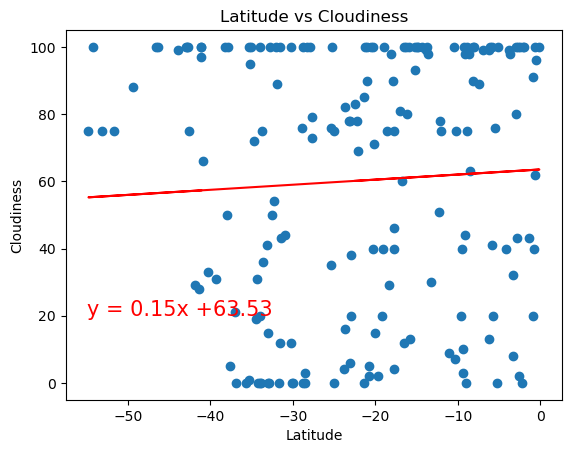

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values, (-55,20), "Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
In the Northern Hemisphere, cloudiness slightly increases with latitude, but the weak r2 value shows latitude only explains a small portion of the variation. In the Southern Hemisphere, 
the relationship is almost non-existent. Overall, cloudiness has a weak correlation with latidude in the Northern Hemisphere and no correlation in the Southern hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is 0.006349871419166081


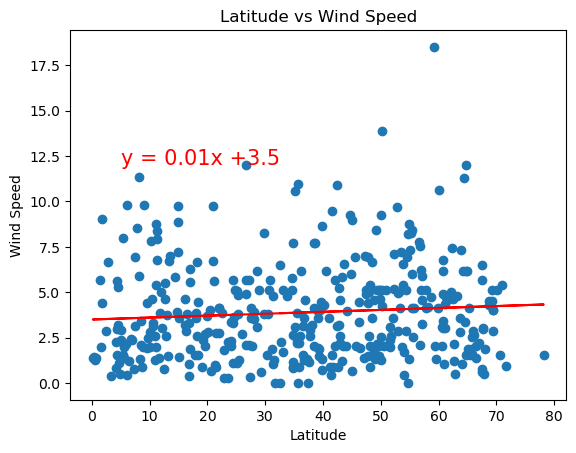

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values, (5,12), "Wind Speed")

The r^2-value is 0.08527109926587303


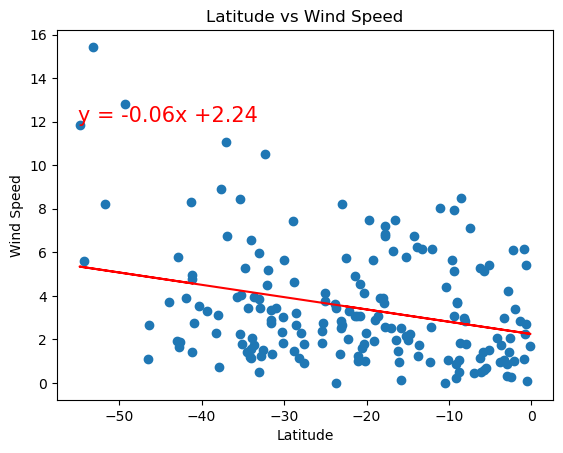

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values, (-55,12), "Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
In the Northern Hemisphere, wind speed shows a slight inrease with latitude, while the Southern Hemisphere shows a small decrease as you move toward the equator, Both Hemispheres have weak
relationships, as seen in the nearly flat slopes and low r2 values, suggesting minimal to no correlation. Overall, wind speed's connection with latitude is weak and inconsistent in both hemispheres,
likely influenced more by external factors than by latitude. 